In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import keras
from keras import layers
import pandas as pd

In [2]:
# 1. Preparación del dataset
dataset_path = r"C:\Users\jquinteros\OneDrive - Esri NOSA\Joffre Quinteros\Maestria\Modelos y aprendizajes\Prueba Final\breast+cancer+wisconsin+diagnostic\wdbc.csv"
df = pd.read_csv(dataset_path, sep=";")

In [3]:
# Visualización de las primeras filas del dataset
print(df.head())

   ID number Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0     842302         M    17.99     10.38      122.80  1001.0      0.11840   
1     842517         M    20.57     17.77      132.90  1326.0      0.08474   
2   84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3   84348301         M    11.42     20.38       77.58   386.1      0.14250   
4   84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  20

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID number           569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

In [5]:
# Verificar valores nulos por cada campo
null_counts = df.isnull().sum()
print(null_counts)

ID number             0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64


In [6]:
# Verificar si hay IDs repetidos
has_duplicates = df.duplicated(subset=['ID number']).any()

if has_duplicates:
    print("Hay IDs repetidos en el DataFrame.")
else:
    print("No hay IDs repetidos en el DataFrame.")

No hay IDs repetidos en el DataFrame.


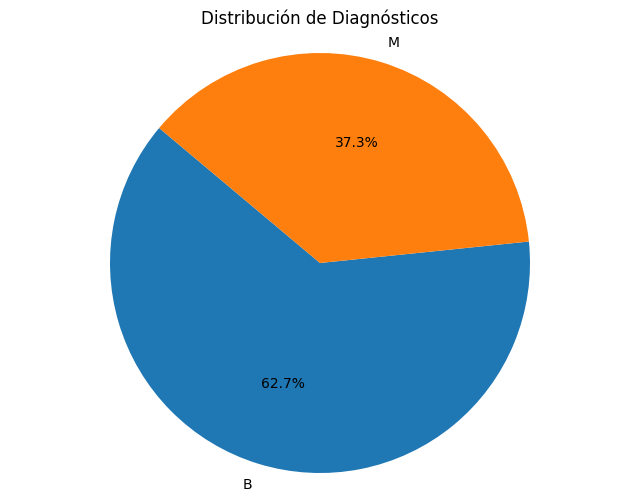

In [7]:
# Contar los diagnósticos
diagnosis_counts = df['Diagnosis'].value_counts()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Diagnósticos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Vamos a arrancar con SVM

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [9]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(['ID number', 'Diagnosis'], axis=1)  # Características
y = df['Diagnosis']  # Etiquetas

In [10]:
# Dividir el conjunto de datos en datos de entrenamiento y datos de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Crear el modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

In [12]:
# Entrenar el modelo
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [13]:
# Realizar predicciones
y_pred = svm_model.predict(X_test)

In [14]:
# Evaluar el modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
[[70  1]
 [ 4 39]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           B       0.95      0.99      0.97        71
           M       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.956140350877193


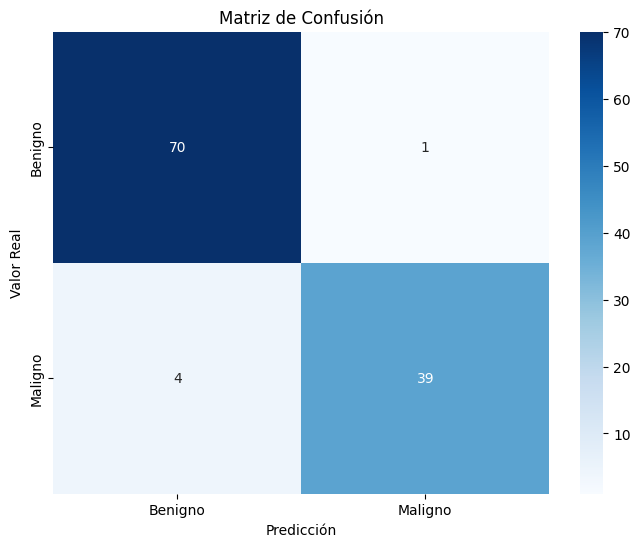

In [16]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión')
plt.show()

### Conclusión:
El modelo detectó 4 como benignos y eran malignos esto es particularmente importante ya que 4 personas estan en riesgo de 114 elementos evaluados.

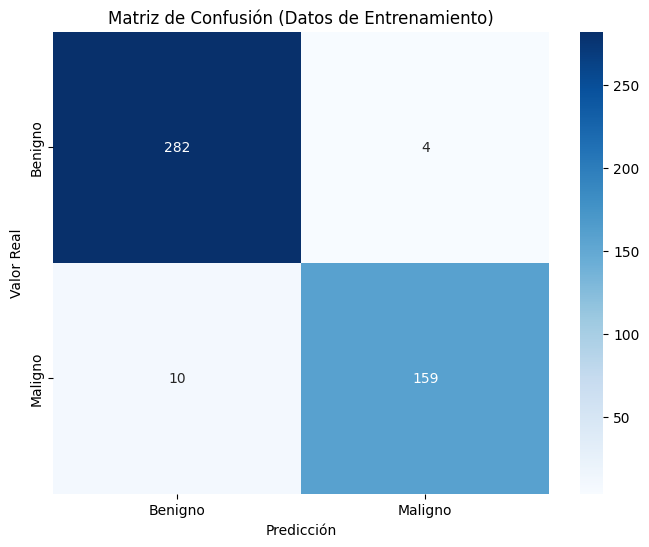

In [17]:
# Realizar predicciones sobre los datos de entrenamiento
y_train_pred = svm_model.predict(X_train)

# Calcular la matriz de confusión
cm_train = confusion_matrix(y_train, y_train_pred)

# Crear el gráfico de matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues', xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión (Datos de Entrenamiento)')
plt.show()

## Random Forest

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [19]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(['ID number', 'Diagnosis'], axis=1)  # Características
y = df['Diagnosis']  # Etiquetas

In [20]:
# Crear y entrenar el modelo Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Creación del modelo
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Paso 5: Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.9649122807017544


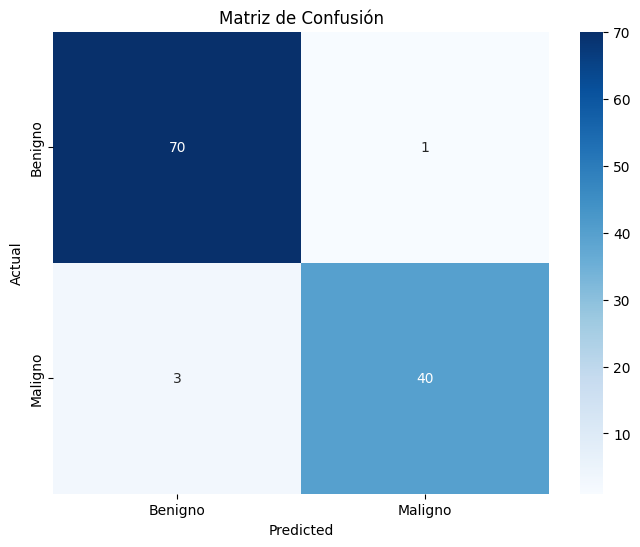

In [23]:
# Crear el gráfico de matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

### Conclusión:
El modelo detectó 3 como benignos y eran malignos esto es particularmente importante ya que 3 personas estan en riesgo de 114 elementos evaluados.

Matrix de confusion de las muestras de entrenamiento

In [24]:
#Hacer predicciones en el conjunto de entrenamiento
y_train_pred = clf.predict(X_train)

In [25]:
# Calcular la matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_train_pred)


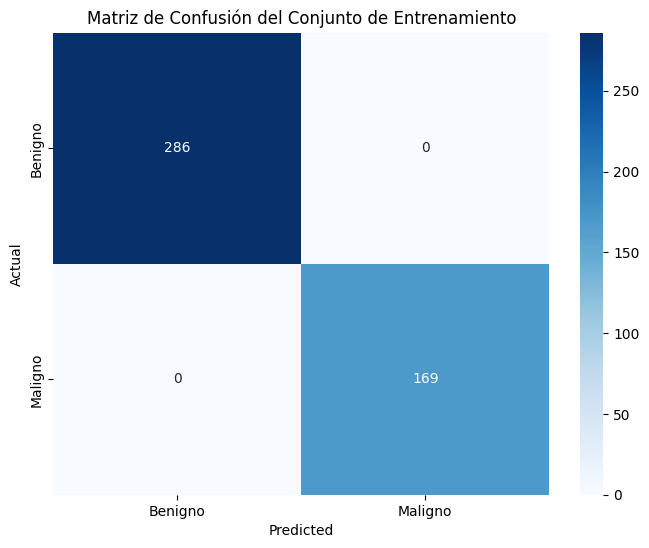

In [26]:
# Crear un mapa de calor para visualizar la matriz de confusión del conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión del Conjunto de Entrenamiento')
plt.show()

## Modelo con KNN

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [28]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X1 = df.drop(['ID number', 'Diagnosis'], axis=1)  # Características
y1 = df['Diagnosis']  # Etiquetas

In [29]:
# Paso 1: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [30]:
# Paso 2 y 3: Crear una instancia del clasificador KNeighborsClassifier
clf = KNeighborsClassifier()

In [31]:
# Paso 4: Entrenar el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)


KNeighborsClassifier()

In [32]:
# Paso 5: Evaluar el modelo en el conjunto de prueba
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.956140350877193


c:\Users\jquinteros\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\jquinteros\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [33]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

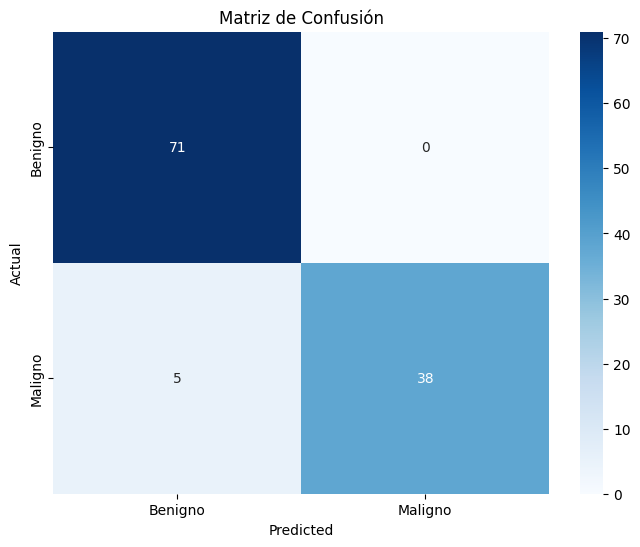

In [34]:
# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

### Conclusión:
El modelo detectó 5 como benignos y eran malignos esto es particularmente importante ya que 5 personas estan en riesgo de 114 elementos evaluados.

In [35]:
# Hacer predicciones en el conjunto de entrenamiento
y_train_pred = clf.predict(X_train)

In [36]:
# Calcular la matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_train_pred)

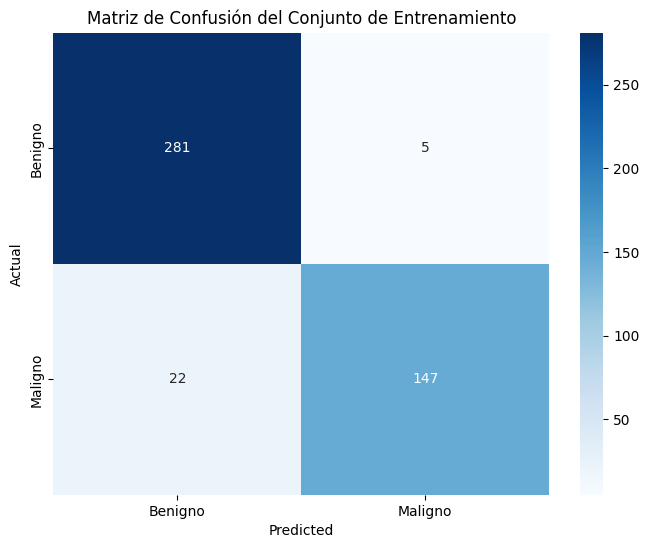

In [37]:
# Crear un mapa de calor para visualizar la matriz de confusión del conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión del Conjunto de Entrenamiento')
plt.show()

## Modelo con XG BOST

In [38]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV

In [39]:
# Dividir el conjunto de datos en características (X) y etiquetas (y)
X = df.drop(['ID number', 'Diagnosis'], axis=1)  # Características
y = df['Diagnosis']  # Etiquetas

In [40]:
# Mapear las etiquetas a valores numéricos
label_mapping = {'B': 0, 'M': 1}
y = y.map(label_mapping)

In [41]:
# Paso 1: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Definir los hiperparámetros para ajustar
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

In [43]:
# Paso 2 y 3: Crear una instancia del clasificador XGBoost y entrenarlo
clf = xgb.XGBClassifier()
# Realizar la búsqueda aleatoria
random_search = RandomizedSearchCV(clf, param_distributions=param_grid, n_iter=100, scoring='accuracy', cv=5, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)


Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=42, scoring='accuracy', verbose=2)

In [44]:
# Obtener el mejor modelo y los mejores hiperparámetros
best_model = random_search.best_estimator_
best_params = random_search.best_params_

print("Mejor modelo:", best_model)
print("Mejores hiperparámetros:", best_params)

Mejor modelo: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Mejores hiperparámetros: {'subsample': 0.7, 'min_child_weight': 2, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}


In [45]:
clf = xgb.XGBClassifier(subsample=0.7, min_child_weight=2, max_depth=4, learning_rate=0.1, gamma=0.3, colsample_bytree=0.8)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
# Paso 4: Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)


In [47]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.9649122807017544


In [48]:
# Paso 5: Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)


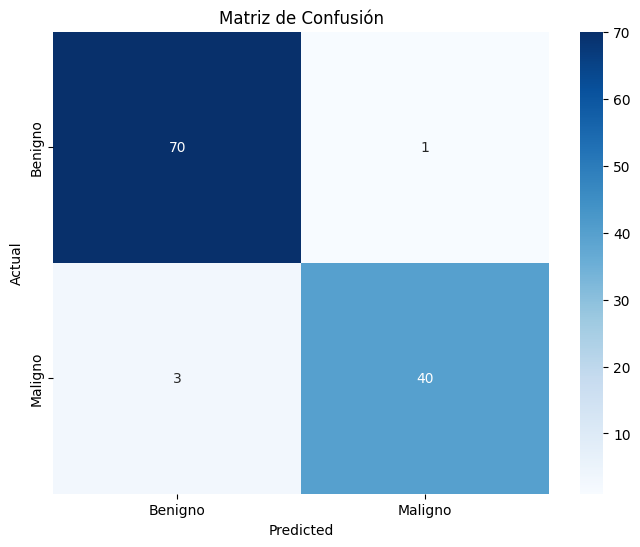

In [49]:
# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

### Conclusión:
El modelo detectó 3 como benignos y eran malignos esto es particularmente importante ya que 3 personas estan en riesgo de 114 elementos evaluados.

In [50]:
#Matrix de confusion del entrenamiento
# Paso 1: Hacer predicciones en el conjunto de entrenamiento
y_train_pred = clf.predict(X_train)

In [51]:
# Paso 2: Calcular la matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_train_pred)

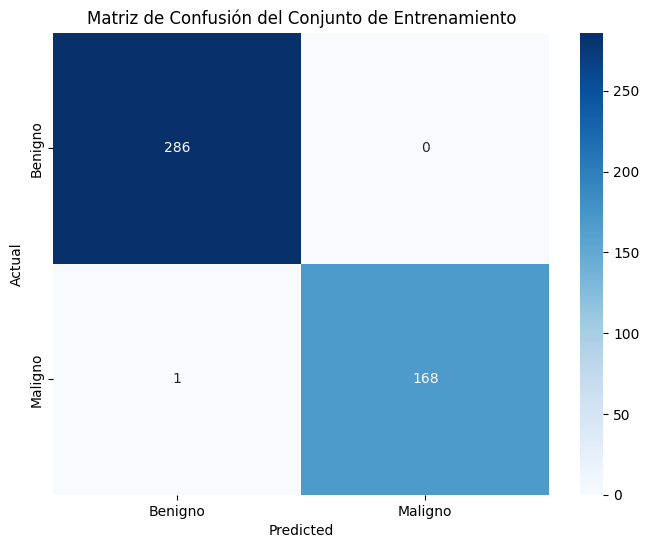

In [52]:
# Paso 3: Visualizar la matriz de confusión del conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión del Conjunto de Entrenamiento')
plt.show()

## Modelo con Redes Neuronales Artificiales

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Paso 1: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
# Paso 2 y 3: Crear una instancia del clasificador MLPClassifier y entrenarlo
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
clf.fit(X_train, y_train)


MLPClassifier(max_iter=1000, random_state=42)

In [56]:
# Paso 4: Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)


In [57]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo:", accuracy)

Exactitud del modelo: 0.9385964912280702


In [58]:
# Paso 5: Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)


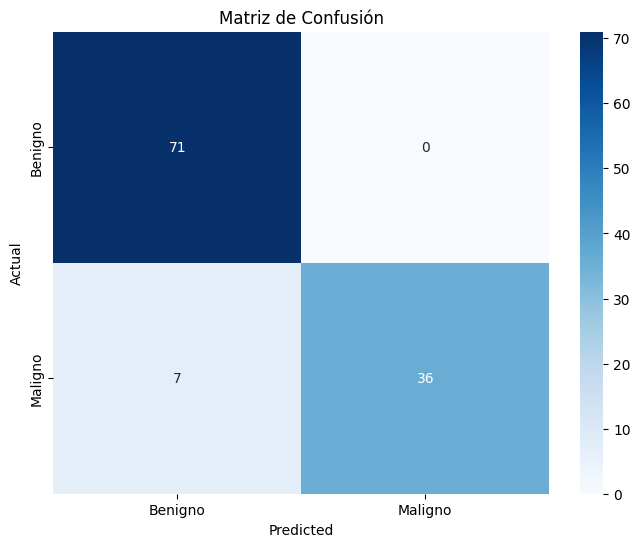

In [59]:
# Crear un mapa de calor para visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión')
plt.show()

### Conclusión:
El modelo detectó 7 como benignos y eran malignos esto es particularmente importante ya que 7 personas estan en riesgo de 114 elementos evaluados.

In [60]:
# Paso 1: Hacer predicciones en el conjunto de entrenamiento
y_train_pred = clf.predict(X_train)



In [61]:
# Paso 2: Calcular la matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_train_pred)



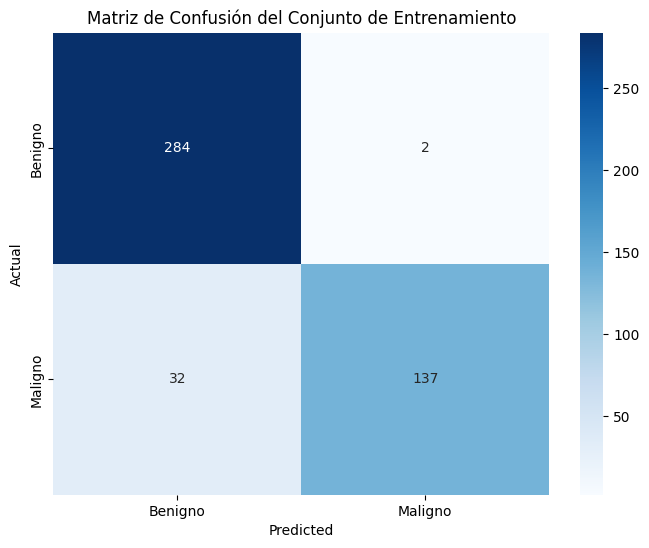

In [62]:
# Paso 3: Visualizar la matriz de confusión del conjunto de entrenamiento
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Benigno', 'Maligno'], 
            yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión del Conjunto de Entrenamiento')
plt.show()


En conclusión, al analizar los diferentes modelos de clasificación utilizados para la detección de cáncer de mama, podemos destacar lo siguiente:

SVM Lineal: Ofrece una alta eficiencia con datos de alta dimensionalidad y una buena capacidad de generalización. Sin embargo, en este caso, detectó 4 casos benignos como malignos, lo que podría tener implicaciones graves para la salud de los pacientes.

Random Forest Classifier: Destaca por su manejo eficiente de datos complejos y su alta precisión en la clasificación. Aunque identificó 3 casos benignos como malignos, su rendimiento general fue superior, con una exactitud del modelo del 96.49%.

KNN: Aunque es un algoritmo simple y fácil de entender, su rendimiento fue ligeramente inferior al detectar 5 casos benignos como malignos.

XGBoost: Demostró una alta precisión y una capacidad efectiva para manejar conjuntos de datos desequilibrados. Identificó 3 casos benignos como malignos, lo que podría tener implicaciones graves para la salud de los pacientes.

Redes Neuronales Perceptrón: Aunque es un modelo simple y rápido de entrenar, su precisión fue ligeramente inferior a la de otros modelos, identificando 7 casos benignos como malignos.

En general, los modelos de Random Forest Classifier y XGBoost mostraron el mejor rendimiento en términos de precisión y capacidad para manejar conjuntos de datos desequilibrados. Sin embargo, es crucial tener en cuenta los casos de falsos positivos, ya que podrían llevar a tratamientos innecesarios y ansiedad para los pacientes. Por lo tanto, es fundamental realizar una evaluación exhaustiva de cada modelo y considerar cuidadosamente sus implicaciones clínicas antes de implementarlos en entornos médicos reales.